# Завдання 1 Граничні задач для звичайних диференціальних рівнянь другого порядку
## Завдання 1.3. Граничні умови 3-го роду (Робіна)

9) $ y'' + y'\sin x + y\cos x = e^x,\ x\in[0,\pi],\ y(0)+y'(0)=0,\ 2y(\pi)+y'(\pi)=1.$


### 1. Дискретизація області

Інтервал $[0, \pi]$ розбивається на $N$ підінтервалів з кроком

$$
h = \frac{\pi}{N}.
$$

Вузли сітки:

$$
x_i = i h, \quad i = 0, 1, 2, \ldots, N.
$$

---

### 2. Скінченні різниці

Друга похідна апроксимується **центральною різницею**:

$$
y''(x_i) \approx \frac{y_{i-1} - 2y_i + y_{i+1}}{h^2}.
$$

Перша похідна — **центральною різницею другого порядку точності**:

$$
y'(x_i) \approx \frac{y_{i+1} - y_{i-1}}{2h}.
$$

Підставимо ці апроксимації в рівняння:

$$
\frac{y_{i-1} - 2y_i + y_{i+1}}{h^2}
+ \frac{y_{i+1} - y_{i-1}}{2h}\sin(x_i)
+ y_i\cos(x_i) = e^{x_i},
$$

що дає лінійне рівняння відносно $y_{i-1}, y_i, y_{i+1}$:

$$\boxed{
\left(\frac{1}{h^2} - \frac{\sin(x_i)}{2h}\right)y_{i-1}
+ \left(-\frac{2}{h^2} + \cos(x_i)\right)y_i
+ \left(\frac{1}{h^2} + \frac{\sin(x_i)}{2h}\right)y_{i+1}
= e^{x_i}.}
$$

---

### 3. Формування системи рівнянь

У результаті формується тридіагональна система:

$$
A\,\mathbf{y} = \mathbf{b},
$$

де:
- $A$ — матриця коефіцієнтів (тридіагональна),
- $\mathbf{y}$ — вектор невідомих значень $y_i$,
- $\mathbf{b}$ — вектор правих частин $f_i$.

---

### 4. Граничні умови Робіна

Для лівої межі:

$$
y(0) + y'(0) = 0
\quad \Rightarrow \quad
y_0 + \frac{y_1 - y_0}{h} = 0
\quad \Rightarrow \quad \boxed{(1 - \tfrac{1}{h})y_0 + \tfrac{1}{h}y_1 = 0.}
$$

Для правої межі:

$$
2y(\pi) + y'(\pi) = 1
\quad \Rightarrow \quad
2y_N + \frac{y_N - y_{N-1}}{h} = 1
\quad \Rightarrow \quad
\boxed{-\tfrac{1}{h}y_{N-1} + (2 + \tfrac{1}{h})y_N = 1.}
$$

Ці рівняння додаються як перший та останній рядки у систему $A\,\mathbf{y} = \mathbf{b}$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def thomas(a, b, c, d):
    """Метод прогонки для тридіагональної системи"""
    n = len(b)
    # Прямий хід
    for i in range(1, n):
        w = a[i] / b[i - 1]
        b[i] = b[i] - w * c[i - 1]
        d[i] = d[i] - w * d[i - 1]
    # Зворотний хід
    y = np.zeros(n)
    y[-1] = d[-1] / b[-1]
    for i in range(n - 2, -1, -1):
        y[i] = (d[i] - c[i] * y[i + 1]) / b[i]
    return y

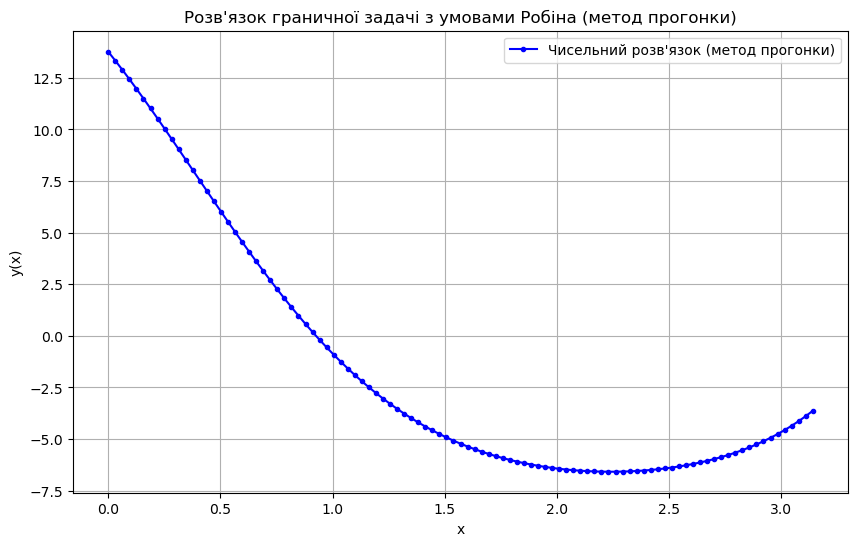

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Налаштування параметрів ---
N = 100  # Кількість точок сітки
x = np.linspace(0, np.pi, N + 1)
h = np.pi / N

# --- 2. Формування коефіцієнтів тридіагональної системи ---
a = np.zeros(N + 1)  # піддіагональ (a[0] не використовується)
b = np.zeros(N + 1)  # головна діагональ
c = np.zeros(N + 1)  # наддіагональ (c[-1] не використовується)
d = np.zeros(N + 1)  # права частина

# --- 3. Заповнення рівнянь для внутрішніх точок ---
i = np.arange(1, N)
a[i] = 1/h**2 - np.sin(x[i]) / (2*h)
b[i] = -2/h**2 + np.cos(x[i])
c[i] = 1/h**2 + np.sin(x[i]) / (2*h)
d[i] = np.exp(x[i])

# --- 4. Застосування граничних умов Робіна ---
# Ліва межа
b[0] = 1 - 1/h
c[0] = 1/h
d[0] = 0.0

# Права межа
a[N] = -1/h
b[N] = 2 + 1/h
d[N] = 1.0

# --- 5. Розв'язання системи методом прогонки ---
y = thomas(a.copy(), b.copy(), c.copy(), d.copy())

# --- 6. Візуалізація результату ---
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Чисельний розв'язок (метод прогонки)", color='blue', marker='o', markersize=3, linestyle='-')
plt.title("Розв'язок граничної задачі з умовами Робіна (метод прогонки)")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid(True)
plt.legend()
plt.show()


# Завдання 2. Граничні задачі для диференціальних рівнянь другого порядку у частинних похідних в декартовій системі координат

2.7) 
$$
\frac{\partial}{\partial x}\left(k_x \frac{\partial u}{\partial x}\right)+\frac{\partial}{\partial y}\left(k_y\frac{\partial u}{\partial y}\right)-qu=f,\qquad 
\begin{cases}
k_x=1+\ln(1+x+y),\\ k_y=1+\sqrt{x^2+y^2},\\ q=-(x+y),\\ f=\cos(x+y).
\end{cases}, \quad [A,B]\times[C,D]=[1.1,2.3]\times[1,2]
$$

Границі:
$$
\begin{cases}
u(1.1,y)=0 & (Діріхле)\\
2u-3\frac{\partial u}{\partial x}(2.3,y)=1 & (Робін)\\
u(x,1)=x & (Діріхле)\\
\frac{\partial u}{\partial y}(x,2)=1 & (Нейман)
\end{cases}
$$


Після дискретизації:
$$\frac{k_{x}{}_{i-0.5,j}}{\Delta x^{2}} u_{i-1,j} +\frac{k_{x}{}_{i+0.5,j}}{\Delta x^{2}} u_{i+1,j} +\frac{k_{y}{}_{i,j-0.5}}{\Delta y^{2}} u_{i,j-1} +\frac{k_{y}{}_{i,j+0.5}}{\Delta y^{2}} u_{i,j+1} -\left(\frac{k_{x}{}_{i+0.5,j} +k_{x}{}_{i-0.5,j}}{\Delta x^{2}} +\frac{k_{y}{}_{i,j+0.5} +k_{y}{}_{i,j-0.5}}{\Delta y^{2}} +q_{i,j}\right) u_{i,j} =f_{i,j}$$

Граничні умови:

$
u(1.1,y)=0 \Rightarrow \boxed{U_{1, j} = 0}
$

$
u(x,1)=x \Rightarrow \boxed{U_{i, 1} = x_i}
$

$
2u-3\frac{\partial u}{\partial x}(2.3, y)=1 \Rightarrow 2U_{n_x, j}-3\frac{U_{n_x, j}-U_{n_x-1, j}}{\Delta x}=1\Rightarrow \boxed{U_{n_x, j}=-\frac{3}{2\Delta x-3} U_{n_{x} -1,j}+\frac{1}{2-\frac{3}{\Delta x}}}
$

$
\frac{\partial u}{\partial y}(x, 2)=1 \Rightarrow \frac{U_{i, n_y}-U_{i, n_y-1}}{\Delta y}=1 \Rightarrow \boxed{U_{i, n_y} = U_{i, n_y-1} + \Delta y}
$

In [12]:
import numpy as np
from numba import jit

@jit(nopython=True, fastmath=True, cache=True)
def relax(ax, ay, cx, cy, b, d_rhs, n, m, U_initial, x_vec, y_vec, dx, dy, omega=1.8, eps=1e-13, max_iter=10_000, boundary_conditions=None):
    """
    Solve the linear system using the Successive Over-Relaxation (SOR) method.
    """
    U = U_initial.copy()  # Work with a copy to keep the initial guess intact
    err = 1.0
    it = 0

    inv_b = np.zeros_like(b)
    inv_b[1:-1, 1:-1] = 1.0 / b[1:-1, 1:-1]
    U_old = U.copy()

    while err > eps and it < max_iter or it < 100:
        it += 1
        
        for i in range(n):
            for j in range(m):
                U_old[i, j] = U[i, j]

        # Interior nodes (i=1..n-2, j=1..m-2)
        for i in range(1, n - 1):
            for j in range(1, m - 1):
                t = (ax[i, j] * U[i - 1, j] + cx[i, j] * U[i + 1, j] +
                     ay[i, j] * U[i, j - 1] + cy[i, j] * U[i, j + 1] -
                     d_rhs[i, j]) * inv_b[i, j]
                

                U[i, j] = t * omega + U[i, j] * (1 - omega)

        U = boundary_conditions(U, x_vec, y_vec, n, m, dx, dy)

        err = 0.0
        for i in range(1, n-1):
            for j in range(1, m-1):
                diff = abs(U[i, j] - U_old[i, j])
                if diff > err:
                    err = diff
        if it % 500 == 0:
            print("iter=", it, "err=", err)

    if it >= max_iter:
        print("Warning: Relaxation method did not converge in", max_iter, "iterations. Final error:", err)
    else:
        print("Converged in", it, "iterations. Final error:", err)


    return U

In [13]:
# --- Функції ---
def kx_fun(x, y):
    return 1 + np.log(1 + x + y)

def ky_fun(x, y):
    return 1 + np.sqrt(x**2 + y**2)

def q_fun(x, y):
    return -(x + y)

def f_fun(x, y):
    return np.cos(x + y)

In [14]:
# --- Налаштування сітки та параметрів ---
nx = 100
ny = 100

Ax, Bx = 1.1, 2.3
Cy, Dy = 1.0, 2.0

x = np.linspace(Ax, Bx, nx)
y = np.linspace(Cy, Dy, ny)
dx = (Bx - Ax) / (nx - 1)
dy = (Dy - Cy) / (ny - 1)
X, Y = np.meshgrid(x, y, indexing='ij')

# --- Розрахунок коефіцієнтів рівняння ---

x_half = 0.5 * (x[:-1] + x[1:])
kx_e = np.empty((nx, ny))
kx_e[:-1, :] = kx_fun(x_half[:, None], y[None, :])
kx_e[-1, :] = kx_e[-2, :]

kx_w = np.empty((nx, ny))
kx_w[1:, :] = kx_fun(x_half[:, None], y[None, :])
kx_w[0, :] = kx_w[1, :]

y_half = 0.5 * (y[:-1] + y[1:])
ky_n = np.empty((nx, ny))
ky_n[:, :-1] = ky_fun(x[:, None], y_half[None, :])
ky_n[:, -1] = ky_n[:, -2]

ky_s = np.empty((nx, ny))
ky_s[:, 1:] = ky_fun(x[:, None], y_half[None, :])
ky_s[:, 0] = ky_s[:, 1]

ax = kx_w / dx**2
cx = kx_e / dx**2
ay = ky_s / dy**2
cy = ky_n / dy**2
b = (ax + ay + cx + cy + q_fun(X, Y))
d_rhs = f_fun(X, Y)

In [15]:
@jit(nopython=True, fastmath=True, cache=True)
def boundary_conditions_1(U, x_vec, y_vec, n, m, dx, dy):

    A = -3.0 / (2.0 * dx - 3.0)
    C = 1.0 / (2.0 - 3.0 / dx)
    
    # 1. Ліва межа (Діріхле)
    for j in range(m):
        U[0, j] = 0.0

    # 2. Нижня межа (Діріхле)
    for i in range(n):
        U[i, 0] = x_vec[i]

    # 3. Права межа (Робіна)
    for j in range(m):
        U[n - 1, j] = A * U[n - 2, j] + C

    # 4. Верхня межа (Неймана)
    for i in range(n):
        U[i, m - 1] = U[i, m - 2] + dy
    
    return U

In [16]:
U = np.zeros_like(X)

# --- Розв'язок системи ---
U_final = relax(ax, ay, cx, cy, b, d_rhs, nx, ny, U, x, y, dx, dy, omega=1.7, eps=1e-5, max_iter=50000, boundary_conditions=boundary_conditions_1)


iter= 500 err= 0.002658196509929489
iter= 1000 err= 0.0021492164964431737
iter= 1500 err= 0.0016379588130779332
iter= 2000 err= 0.001242179978232727
iter= 2500 err= 0.0009414083607346413
iter= 3000 err= 0.0007133914032593225
iter= 3500 err= 0.0005405936159741387
iter= 4000 err= 0.00040964994257208787
iter= 4500 err= 0.00031042359168420575
iter= 5000 err= 0.00023523206175646294
iter= 5500 err= 0.00017825359879530822
iter= 6000 err= 0.00013507659288425344
iter= 6500 err= 0.00010235802285940565
iter= 7000 err= 7.756462181962576e-05
iter= 7500 err= 5.877673669285599e-05
iter= 8000 err= 4.4539697288570324e-05
iter= 8500 err= 3.375118705495339e-05
iter= 9000 err= 2.5575895142182503e-05
iter= 9500 err= 1.9380841667526738e-05
iter= 10000 err= 1.4686368615457468e-05
iter= 10500 err= 1.1129001865839427e-05
Converged in 10693 iterations. Final error: 9.999063964372112e-06


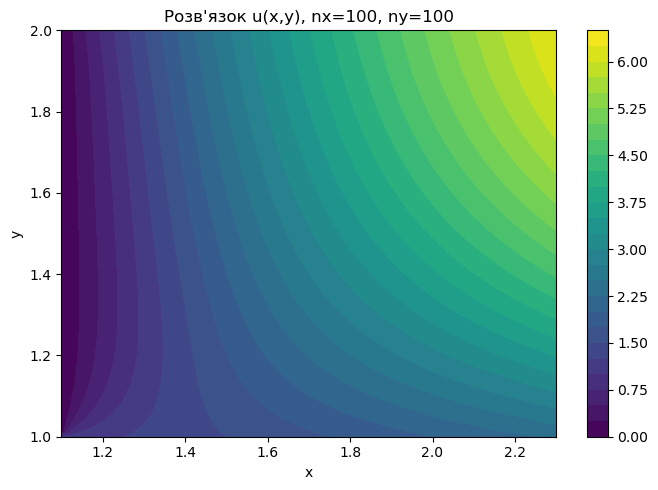

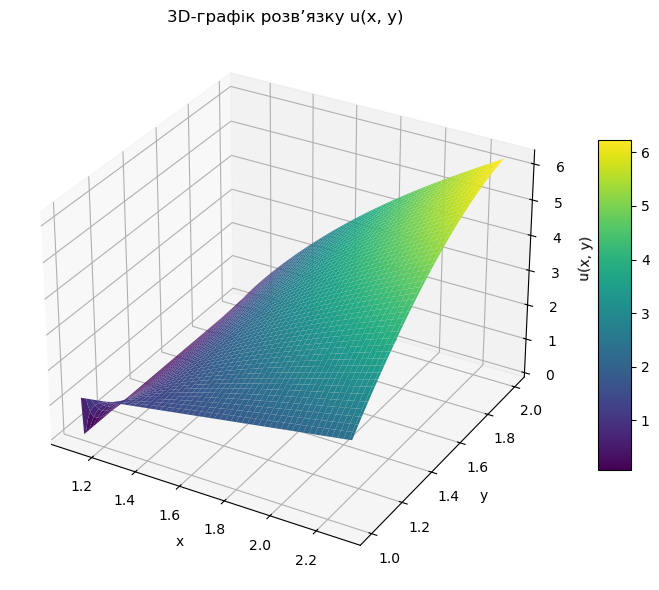

In [17]:
from mpl_toolkits.mplot3d import Axes3D 

# 2D-контур
fig = plt.figure(figsize=(7, 5))
c = plt.contourf(X, Y, U_final, levels=30)
plt.colorbar(c)
plt.title(f"Розв'язок u(x,y), nx={nx}, ny={ny}")
plt.xlabel("x"); plt.ylabel("y")
plt.tight_layout()
plt.show()

# 3D-поверхня
fig = plt.figure(figsize=(8, 6))
axis = fig.add_subplot(111, projection='3d')
surf = axis.plot_surface(X, Y, U_final, cmap='viridis', edgecolor='none')
axis.set_xlabel('x')
axis.set_ylabel('y')
axis.set_zlabel('u(x, y)')
axis.set_title("3D-графік розв’язку u(x, y)")
fig.colorbar(surf, ax=axis, shrink=0.6, aspect=10)
plt.tight_layout()
plt.show()

In [18]:
# --- Verification (адаптовано під поточну задачу) -------------------------
# PDE:  ax*U[i-1,j] + cx*U[i+1,j] + ay*U[i, j-1] + cy*U[i, j+1] - b*U[i,j] = d_rhs

# 1) PDE-резидуал (внутрішні вузли)
pde_residual = np.zeros_like(U_final)
for i in range(1, nx-1):
    for j in range(1, ny-1):
        Rij = (ax[i, j] * U_final[i-1, j] +
               cx[i, j] * U_final[i+1, j] +
               ay[i, j] * U_final[i, j-1] +
               cy[i, j] * U_final[i, j+1] -
               b[i, j]  * U_final[i, j] -
               d_rhs[i, j])
        pde_residual[i, j] = Rij

# 2) Граничні умови
# Ліва: Діріхле u=0
bc_left_dirichlet = np.abs(U_final[0, 1:-1])

# Нижня: Діріхле u=x
bc_bottom_dirichlet = np.abs(U_final[1:-1, 0] - x[1:-1])

# Верхня: Нейман (du/dy = 1)
bc_top_neumann = np.abs((U_final[1:-1, ny-1] - U_final[1:-1, ny-2]) / dy - 1.0)

# Права: Робін у тій же дискретній формі, що в boundary_conditions_1
A = -3.0 / (2.0 * dx - 3.0)
C =  1.0 / (2.0 - 3.0 / dx)
bc_right_robin_discrete = np.abs(U_final[nx-1, 1:-1] - (A * U_final[nx-2, 1:-1] + C))

# 3) Зведена статистика
mask_int = (slice(1, nx-1), slice(1, ny-1))
pde_max   = np.max(np.abs(pde_residual[mask_int]))
pde_l2    = np.sqrt(np.mean(pde_residual[mask_int]**2))

print("--- Verification Results ---")
print(f"PDE residual (max, interior): {pde_max: .3e}")
print(f"PDE residual (L2 , interior): {pde_l2 : .3e}")
print(f"BC left  (Dirichlet u=0)     : {np.max(bc_left_dirichlet): .3e}")
print(f"BC bottom(Dirichlet u=x)     : {np.max(bc_bottom_dirichlet): .3e}")
print(f"BC top   (Neumann du/dy=1)   : {np.max(bc_top_neumann): .3e}")
print(f"BC right (Robin, discrete)   : {np.max(bc_right_robin_discrete): .3e}")


--- Verification Results ---
PDE residual (max, interior):  1.036e-01
PDE residual (L2 , interior):  4.325e-02
BC left  (Dirichlet u=0)     :  0.000e+00
BC bottom(Dirichlet u=x)     :  0.000e+00
BC top   (Neumann du/dy=1)   :  2.842e-14
BC right (Robin, discrete)   :  1.776e-15


# Завдання 3. Рівняння Пуассона, яке задане у полярній системі координат

Загальний вигляд рівняння:
$$
\Delta u(r, \varphi) = \frac{1}{r} \frac{\partial}{\partial r} 
\left( r \frac{\partial u}{\partial r} \right)
+ \frac{1}{r^2} \frac{\partial^2 u}{\partial \varphi^2}
= f(r, \varphi)
$$


\begin{array}{l}

\dfrac{\partial }{\partial r}\left( r\dfrac{\partial u}{\partial r}\right) 
\approx \dfrac{r_{i+0.5}\dfrac{\partial u}{\partial r}_{i+0.5,j} - r_{i-0.5}\dfrac{\partial u}{\partial r}_{i-0.5,j}}{\Delta r} 
\approx \dfrac{r_{i+0.5}\dfrac{u_{i+1,j} - u_{i,j}}{\Delta r} - r_{i-0.5}\dfrac{u_{i,j} - u_{i-1,j}}{\Delta r}}{\Delta r} 
= \dfrac{r_{i+0.5}(u_{i+1,j} - u_{i,j}) - r_{i-0.5}(u_{i,j} - u_{i-1,j})}{\Delta r^{2}} \\[1.2em]

\dfrac{1}{r}\dfrac{\partial }{\partial r}\left( r\dfrac{\partial u}{\partial r}\right) 
\approx \dfrac{r_{i+0.5}(u_{i+1,j} - u_{i,j}) - r_{i-0.5}(u_{i,j} - u_{i-1,j})}{r_{i}\Delta r^{2}} \\[1.2em]

\dfrac{1}{r^{2}}\dfrac{\partial ^{2} u}{\partial \varphi ^{2}} 
\approx \dfrac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{r_{i}^{2}\Delta \varphi ^{2}} \\[1.2em]
\\
\dfrac{1}{r}\dfrac{\partial }{\partial r}\left( r\dfrac{\partial u}{\partial r}\right) 
+ \dfrac{1}{r^{2}}\dfrac{\partial ^{2} u}{\partial \varphi ^{2}} 
\approx 
\dfrac{r_{i+0.5}(u_{i+1,j} - u_{i,j}) - r_{i-0.5}(u_{i,j} - u_{i-1,j})}{r_{i}\Delta r^{2}} 
+ \dfrac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{r_{i}^{2}\Delta \varphi ^{2}} \\[1.2em]

= \boxed{\frac{r_{i-0.5}}{r_{i} \Delta r^{2}} u_{i-1,j} +\frac{r_{i+0.5}}{r_{i} \Delta r^{2}} u_{i+1,j} +\frac{1}{r_{i}^{2} \Delta \varphi ^{2}} u_{i,j-1} +\frac{1}{r_{i}^{2} \Delta \varphi ^{2}} u_{i,j+1} -\left(\frac{r_{i+0.5} +r_{i-0.5}}{r_{i} \Delta r^{2}} +\frac{2}{r_{i}^{2} \Delta \varphi ^{2}}\right) u_{i,j} = f(r_i, \varphi_j)}
\end{array}


**Задача 3.4**

$$
r \in [0.7; 2.0], \quad \varphi \in \left[0, \frac{\pi}{4}\right],
\quad f(r, \varphi) = r\sin \varphi
$$

$$
u(0.7, \varphi) = 0, 
\quad \frac{\partial u}{\partial r}(2.0, \varphi) = \varphi^2
$$

$$
2u + 3\frac{\partial u}{\partial \varphi}(r, 0) = 1,
\quad
u - 2\frac{\partial u}{\partial \varphi}\left(r, \frac{\pi}{4}\right) = 0
$$


Граничні умови:


$
u(0.7, \varphi) = 0, \Rightarrow \boxed{U_{1,j} = 0}
$

$
\frac{\partial u}{\partial r}(2.0, \varphi) = \varphi^2 \Rightarrow \boxed{U_{n_r,j} = U_{n_r-1,j}+\varphi^2_j\Delta r}
$

$
2u + 3\frac{\partial u}{\partial \varphi}(r, 0) = 1, \Rightarrow \boxed{U_{i,1} =\frac{3U_{i,2} -\Delta \varphi }{3-2\Delta \varphi }}
$

$
u - 2\frac{\partial u}{\partial \varphi}\left(r, \frac{\pi}{4}\right) = 0 \Rightarrow \boxed{U_{i,n_{\varphi }} =\frac{2U_{i,n_{\varphi } -1}}{2-\Delta \varphi }}
$

In [25]:
# ---------- PDE data ----------
Rmin, Rmax = 0.7, 2.0
Phimin, Phimax = 0.0, np.pi/4
f_fun = lambda r, phi: r * np.sin(phi)

# ---------- grid ----------
nr = 64      # кількість вузлів по r
nphi = 64    # кількість вузлів по phi
r = np.linspace(Rmin, Rmax, nr)
phi = np.linspace(Phimin, Phimax, nphi)
dr = (Rmax - Rmin) / (nr - 1)
dphi = (Phimax - Phimin) / (nphi - 1)
R, Phi = np.meshgrid(r, phi, indexing='ij')

In [26]:
# півкроки
r_half = 0.5 * (r[1:] + r[:-1])          # shape: (nr-1,)
ri = r[:, None]                          # shape: (nr, 1)


# ---------- coefficients ----------
ar   = np.zeros((nr, nphi))               # для u_{i-1,j}
cr   = np.zeros((nr, nphi))               # для u_{i+1,j}
aphi = np.zeros((nr, nphi))               # для u_{i, j-1}
cphi = np.zeros((nr, nphi))               # для u_{i, j+1}
b    = np.zeros((nr, nphi))               # для u_{i,j}

for i in range(1, nr - 1):
    for j in range(1, nphi - 1):
        ri = r[i]
        r_im_half = (r[i] + r[i-1]) / 2.0
        r_ip_half = (r[i] + r[i+1]) / 2.0

        ar[i, j]   = r_im_half / (ri * dr**2)
        cr[i, j]   = r_ip_half / (ri * dr**2)
        aphi[i, j] = 1.0 / (ri**2 * dphi**2)
        cphi[i, j] = 1.0 / (ri**2 * dphi**2)
        b[i, j]    = ar[i, j] + cr[i, j] + aphi[i, j] + cphi[i, j]
        
d = f_fun(R, Phi)                          # d_{i,j} = f(r_i, phi_j)

In [27]:
@jit(nopython=True, fastmath=True, cache=True)
def boundary_conditions_2(U, r_vec, phi_vec, nr, nphi, dr, dphi):
    # Граничні умови
    U[0, :] = 0

    U[nr - 1, :] = U[nr - 2, :] + phi_vec**2*dr

    U[:, 0] = (dphi - 3.0*U[:, 1]) / (2.0*dphi - 3.0)

    U[:, nphi - 1] = 2*U[:, nphi - 2] / (2.0 - dphi)
    return U

In [ ]:
U = np.zeros_like(R)

# --- Розв'язок системи ---
U_final = relax(ar, aphi, cr, cphi, b, d, nr, nphi, U, r, phi, dr, dphi, omega=1.84, eps=1e-9, max_iter=50000, boundary_conditions=boundary_conditions_2)

iter= 500 err= 0.0009610001303210769
iter= 1000 err= 0.0007486856297087563
iter= 1500 err= 0.0005850440084766984
iter= 2000 err= 0.00045717625691787944
iter= 2500 err= 0.0003572554198083555
iter= 3000 err= 0.000279173367132568
iter= 3500 err= 0.0002181569952335316
iter= 4000 err= 0.0001704764142034243
iter= 4500 err= 0.0001332169420851237
iter= 5000 err= 0.00010410093232637863
iter= 5500 err= 8.134854277530579e-05
iter= 6000 err= 6.356893510517381e-05
iter= 6500 err= 4.9675253822822896e-05
iter= 7000 err= 3.881818750350874e-05
iter= 7500 err= 3.0334050963531922e-05
iter= 8000 err= 2.3704214622721764e-05
iter= 8500 err= 1.852340103125627e-05
iter= 9000 err= 1.447491052486427e-05
iter= 9500 err= 1.131126159803486e-05
iter= 10000 err= 8.839062506371675e-06
iter= 10500 err= 6.90718938178847e-06
iter= 11000 err= 5.39754811379467e-06
iter= 11500 err= 4.217855343213728e-06
iter= 12000 err= 3.2959972413593164e-06
iter= 12500 err= 2.5756212416183644e-06
iter= 13000 err= 2.0126912421147836e-06
i

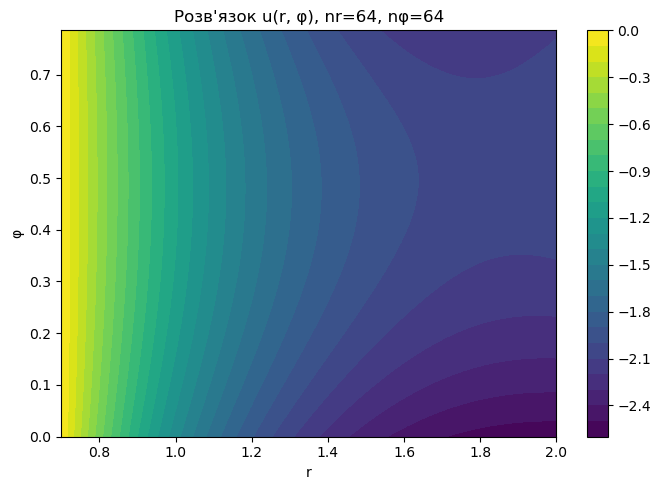

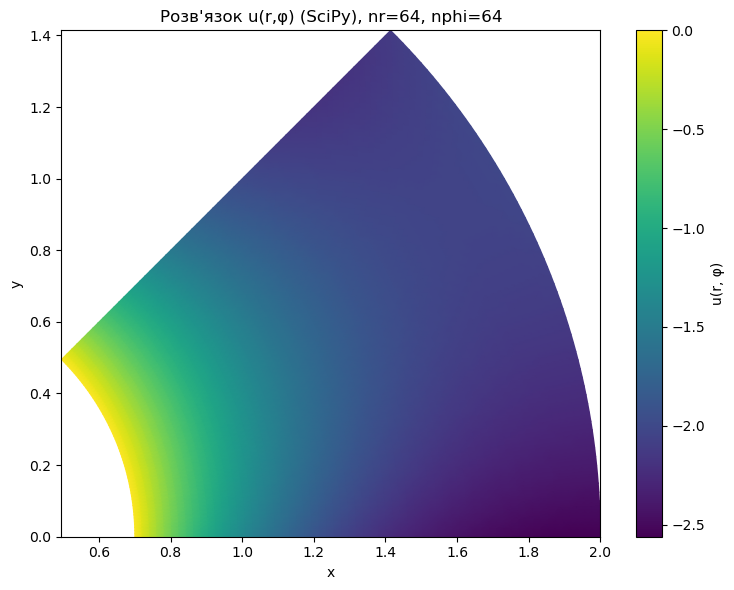

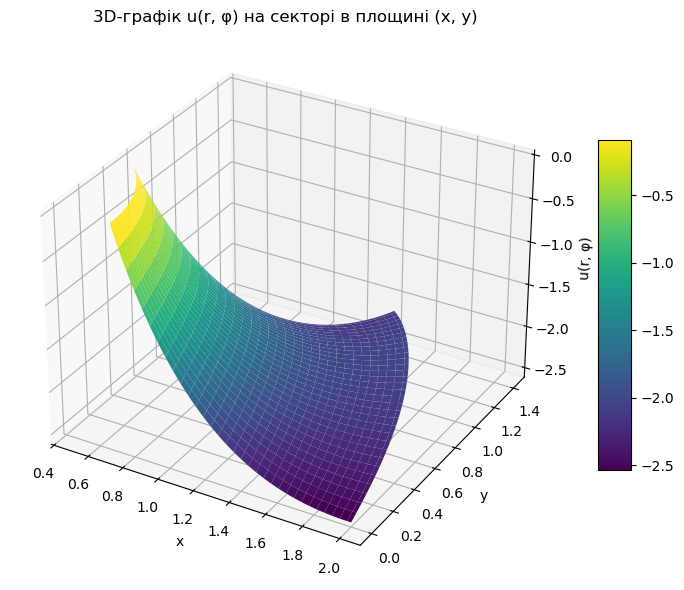

In [29]:
# ---------------------------
# 2D: контур у координатах (r, φ)
# ---------------------------
plt.figure(figsize=(7, 5))
cs = plt.contourf(R, Phi, U_final, levels=30)
plt.colorbar(cs)
plt.title(f"Розв'язок u(r, φ), nr={R.shape[0]}, nφ={R.shape[1]}")
plt.xlabel("r")
plt.ylabel("φ")
plt.tight_layout()
plt.show()

# --- Візуалізація ---
# Для коректного відображення полярних даних, перетворимо їх в декартові координати
R_mesh, PHI_mesh = np.meshgrid(r, phi, indexing='ij')
X = R_mesh * np.cos(PHI_mesh)
Y = R_mesh * np.sin(PHI_mesh)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
# Використовуємо pcolormesh для кращого відображення секторної області
c = ax.pcolormesh(X, Y, U_final, shading='gouraud', cmap='viridis')
fig.colorbar(c, label="u(r, φ)")
ax.set_title(f"Розв'язок u(r,φ) (SciPy), nr={nr}, nphi={nphi}")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect('equal', 'box')
plt.tight_layout()
plt.show()

# ---------------------------
# 3D поверхня у площині (x, y)
# ---------------------------
X = R * np.cos(Phi)
Y = R * np.sin(Phi)

fig = plt.figure(figsize=(8, 6))
ax3 = fig.add_subplot(111, projection='3d')
surf = ax3.plot_surface(X, Y, U_final, cmap='viridis', edgecolor='none')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('u(r, φ)')
ax3.set_title("3D-графік u(r, φ) на секторі в площині (x, y)")
fig.colorbar(surf, ax=ax3, shrink=0.6, aspect=10)
plt.tight_layout()
plt.show()

In [30]:
# --- Verification ----------------------------------------------------------
pde_residual = np.zeros_like(U_final)        # (nr, nphi)

# 1. Перевірка рівняння на внутрішніх вузлах
for i in range(1, nr - 1):                   # радіальний індекс
    ri    = r[i]
    r_ip  = ri + dr/2.0
    r_im  = ri - dr/2.0
    for j in range(1, nphi - 1):             # кутовий індекс
        phij = phi[j]

        lap = ((r_im / (ri * dr**2)) * U_final[i-1, j] +
               (r_ip / (ri * dr**2)) * U_final[i+1, j] +
               (1.0 / (ri**2 * dphi**2)) * (U_final[i, j-1] + U_final[i, j+1]) -
               ((r_ip + r_im) / (ri * dr**2) + 2.0 / (ri**2 * dphi**2)) * U_final[i, j])

        pde_residual[i, j] = lap - f_fun(ri, phij)

# 2. Перевірка граничних умов
bc_inner_r  = np.abs(U_final[0, 1:-1])                                            # r = 0.7
bc_outer_r  = np.abs((U_final[nr-1, 1:-1] - U_final[nr-2, 1:-1]) / dr - phi[1:-1]**2)      # r = 2.0

bc_phi_0    = np.abs(2.0 * U_final[1:-1, 0] +
                     3.0 * (U_final[1:-1, 1] - U_final[1:-1, 0]) / dphi - 1.0)       # φ = 0

bc_phi_pi4  = np.abs(U_final[1:-1, nphi-1] -
                     2.0 * (U_final[1:-1, nphi-1] - U_final[1:-1, nphi-2]) / dphi)   # φ = π/4

# 3. Зведена статистика
print("--- Verification Results ---")
print(f"PDE residual (interior)  : {np.max(np.abs(pde_residual[1:-1, 1:-1])): .2e}")
print(f"BC at r=0.7 (Dirichlet)  : {np.max(bc_inner_r): .2e}")
print(f"BC at r=2.0 (Neumann)    : {np.max(bc_outer_r): .2e}")
print(f"BC at φ=0 (Robin)        : {np.max(bc_phi_0): .2e}")
print(f"BC at φ=π/4 (Robin)      : {np.max(bc_phi_pi4): .2e}")


--- Verification Results ---
PDE residual (interior)  :  3.82e-10
BC at r=0.7 (Dirichlet)  :  0.00e+00
BC at r=2.0 (Neumann)    :  1.06e-14
BC at φ=0 (Robin)        :  1.17e-13
BC at φ=π/4 (Robin)      :  5.82e-14


Filling the matrix A and vector b...
Converting matrix to CSR format...
Solving the linear system...
System solved.


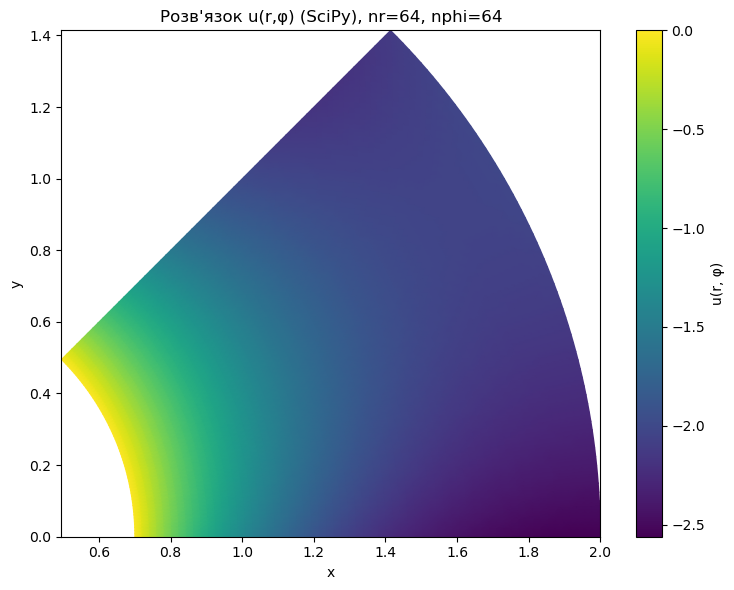

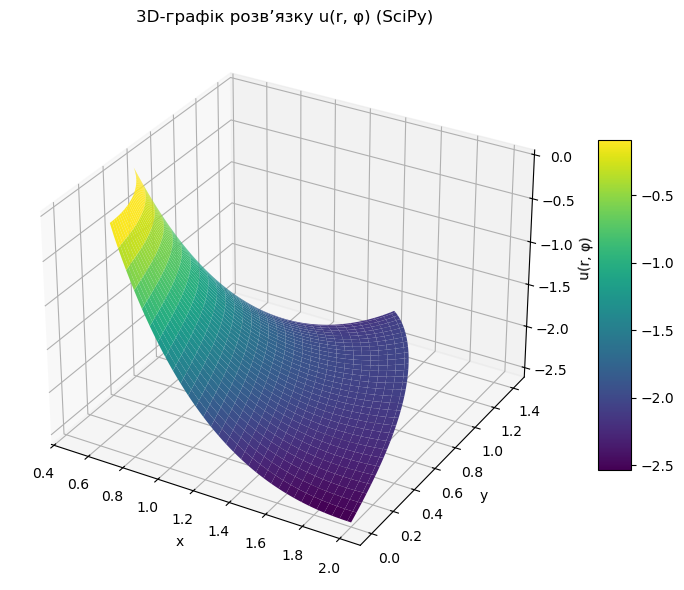

In [212]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve

# --- Функція правої частини ---
def f_fun(r, phi):
    return r * np.sin(phi)

# --- Налаштування сітки та параметрів ---
nr = 64  # Кількість вузлів по радіусу
nphi = 64 # Кількість вузлів по куту
N = nr * nphi # Загальна кількість невідомих

R_MIN, R_MAX = 0.7, 2.0
PHI_MIN, PHI_MAX = 0.0, np.pi / 4.0

r = np.linspace(R_MIN, R_MAX, nr)
phi = np.linspace(PHI_MIN, PHI_MAX, nphi)
dr = (R_MAX - R_MIN) / (nr - 1)
dphi = (PHI_MAX - PHI_MIN) / (nphi - 1)

# --- Створення розрідженої матриці A та вектора b ---
A = lil_matrix((N, N))
b = np.zeros(N)

# --- Заповнення матриці A та вектора b ---
print("Filling the matrix A and vector b...")
for i in range(nr):       # Індекс для r
    for j in range(nphi): # Індекс для phi
        k = i * nphi + j  # Перетворення 2D індекса (i, j) в 1D індекс k

        # Граничні умови (мають вищий пріоритет)

        # Внутрішня границя r=1 (Діріхле): u(1, phi) = phi
        if i == 0:
            A[k, k] = 1.0
            b[k] = 0
            continue # Переходимо до наступного вузла

        # Зовнішня границя r=3 (Нейман): du/dr = 1
        # (U_{nr-1, j} - U_{nr-2, j}) / dr = 1  =>  U_{nr-1, j} - U_{nr-2, j} = dr
        elif i == nr - 1:
            k_prev_r = (i - 1) * nphi + j
            A[k, k] = 1.0
            A[k, k_prev_r] = -1.0
            b[k] = dr*phi[j]**2
            continue

        # Нижня границя phi=0 (Робін): 2u + du/dphi = 0
        # 2*U_{i,0} + (U_{i,1} - U_{i,0}) / dphi = 0  => (2 - 1/dphi)*U_{i,0} + (1/dphi)*U_{i,1} = 0
        elif j == 0:
            k_next_phi = i * nphi + (j + 1)
            A[k, k] = (2.0*dphi-3)
            A[k, k_next_phi] = 3.0
            b[k] = dphi
            continue

        # Верхня границя phi=pi/3 (Робін): u - 2*du/dphi = 2
        # U_{i, nphi-1} - 2*(U_{i, nphi-1} - U_{i, nphi-2})/dphi = 2 => (1 - 2/dphi)*U_{i, nphi-1} + (2/dphi)*U_{i, nphi-2} = 2
        elif j == nphi - 1:
            k_prev_phi = i * nphi + (j - 1)
            A[k, k] = (dphi-2)
            A[k, k_prev_phi] = 2.0
            b[k] = 0.0
            continue

        # Внутрішні вузли (основне рівняння)
        else:
            # Індекси сусідів
            k_im1 = (i - 1) * nphi + j
            k_ip1 = (i + 1) * nphi + j
            k_jm1 = i * nphi + (j - 1)
            k_jp1 = i * nphi + j + 1

            # Коефіцієнти з вашої дискретизації
            r_i = r[i]
            r_iph = r_i + dr / 2.0
            r_imh = r_i - dr / 2.0

            c_im1 = r_imh / (r_i * dr**2)
            c_ip1 = r_iph / (r_i * dr**2)
            c_jm1 = 1.0 / (r_i**2 * dphi**2)
            c_jp1 = 1.0 / (r_i**2 * dphi**2)
            c_i   = -( (r_iph + r_imh) / (r_i * dr**2) + 2.0 / (r_i**2 * dphi**2) )

            A[k, k_im1] = c_im1
            A[k, k_ip1] = c_ip1
            A[k, k_jm1] = c_jm1
            A[k, k_jp1] = c_jp1
            A[k, k]     = c_i
            b[k]        = f_fun(r_i, phi[j])

# --- Розв'язок системи ---
print("Converting matrix to CSR format...")
A_csr = A.tocsr()
print("Solving the linear system...")
u_flat = spsolve(A_csr, b)
print("System solved.")

# Перетворення 1D-вектора результату назад у 2D-матрицю
U_final = u_flat.reshape((nr, nphi))

# --- Візуалізація ---
# Для коректного відображення полярних даних, перетворимо їх в декартові координати
R_mesh, PHI_mesh = np.meshgrid(r, phi, indexing='ij')
X = R_mesh * np.cos(PHI_mesh)
Y = R_mesh * np.sin(PHI_mesh)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
# Використовуємо pcolormesh для кращого відображення секторної області
c = ax.pcolormesh(X, Y, U_final, shading='gouraud', cmap='viridis')
fig.colorbar(c, label="u(r, φ)")
ax.set_title(f"Розв'язок u(r,φ) (SciPy), nr={nr}, nphi={nphi}")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect('equal', 'box')
plt.tight_layout()
plt.show()

# 3D-поверхня
fig = plt.figure(figsize=(8, 6))
axis = fig.add_subplot(111, projection='3d')
surf = axis.plot_surface(X, Y, U_final, cmap='viridis', edgecolor='none')
axis.set_xlabel('x')
axis.set_ylabel('y')
axis.set_zlabel('u(r, φ)')
axis.set_title("3D-графік розв’язку u(r, φ) (SciPy)")
fig.colorbar(surf, ax=axis, shrink=0.6, aspect=10)
plt.tight_layout()
plt.show()

In [221]:
# --- Verification ----------------------------------------------------------
pde_residual = np.zeros_like(U_final)        # (nr, nphi)

# 1. Перевірка рівняння на внутрішніх вузлах
for i in range(1, nr - 1):                   # радіальний індекс
    ri    = r[i]
    r_ip  = ri + dr/2.0
    r_im  = ri - dr/2.0
    for j in range(1, nphi - 1):             # кутовий індекс
        phij = phi[j]

        lap = ((r_im / (ri * dr**2)) * U_final[i-1, j] +
               (r_ip / (ri * dr**2)) * U_final[i+1, j] +
               (1.0 / (ri**2 * dphi**2)) * (U_final[i, j-1] + U_final[i, j+1]) -
               ((r_ip + r_im) / (ri * dr**2) + 2.0 / (ri**2 * dphi**2)) * U_final[i, j])

        pde_residual[i, j] = lap - f_fun(ri, phij)

# 2. Перевірка граничних умов
bc_inner_r  = np.abs(U_final[0, 1:-1])                                            # r = 0.7
bc_outer_r  = np.abs((U_final[nr-1, 1:-1] - U_final[nr-2, 1:-1]) / dr - phi[1:-1]**2)      # r = 2.0

bc_phi_0    = np.abs(2.0 * U_final[1:-1, 0] +
                     3.0 * (U_final[1:-1, 1] - U_final[1:-1, 0]) / dphi - 1.0)       # φ = 0

bc_phi_pi4  = np.abs(U_final[1:-1, nphi-1] -
                     2.0 * (U_final[1:-1, nphi-1] - U_final[1:-1, nphi-2]) / dphi)   # φ = π/4

# 3. Зведена статистика
print("--- Verification Results ---")
print(f"PDE residual (interior)  : {np.max(np.abs(pde_residual[1:-1, 1:-1])): .2e}")
print(f"BC at r=0.7 (Dirichlet)  : {np.max(bc_inner_r): .2e}")
print(f"BC at r=2.0 (Neumann)    : {np.max(bc_outer_r): .2e}")
print(f"BC at φ=0 (Robin)        : {np.max(bc_phi_0): .2e}")
print(f"BC at φ=π/4 (Robin)      : {np.max(bc_phi_pi4): .2e}")


--- Verification Results ---
PDE residual (interior)  :  1.63e-11
BC at r=0.7 (Dirichlet)  :  0.00e+00
BC at r=2.0 (Neumann)    :  1.06e-14
BC at φ=0 (Robin)        :  7.55e-14
BC at φ=π/4 (Robin)      :  4.40e-14


# Завдання 4. Рівняння Пуассона, яке задане у полярній системі координат (осесиметричний випадок)

Загальний вигляд рівняння:
$$
\Delta u(r)=\frac 1r \frac{d}{dr}\left(r\frac{du}{dr}\right)=f(r)
$$

Після дискретизації:
$$
\left(r_i - \frac{h}{2}\right)u_{i-1} + \left(r_i + \frac{h}{2}\right)u_{i+1} - 2r_i u_i   = h^2 r_i f_i
$$

Задача 4.8

$
f(r)=r^3,\quad r\in[0.9,1.9]
$

$
u(0.9)+u'(0.9)=0,\ \ u(1.9)=1.
$

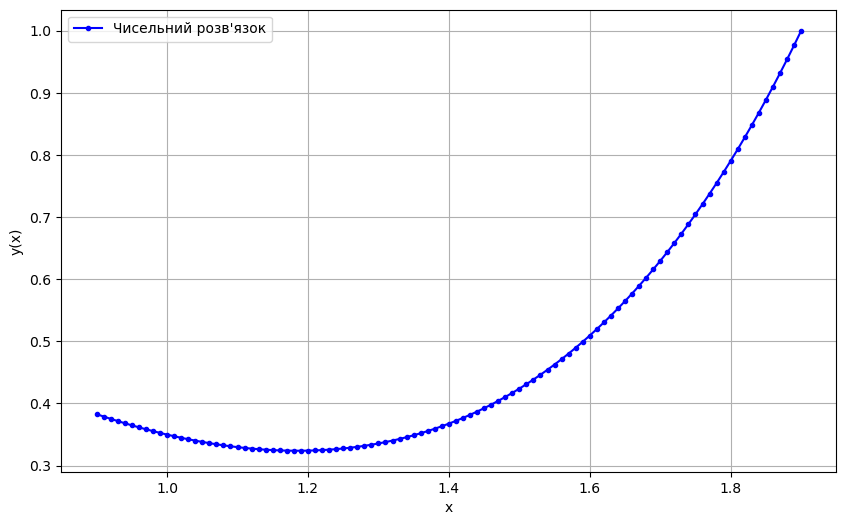

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Налаштування параметрів ---
N = 100  # Кількість точок сітки
rmin, rmax = 0.9, 1.9
r = np.linspace(rmin, rmax, N + 1)
h = (rmax - rmin) / N

# --- 2. Формування коефіцієнтів тридіагональної системи ---
a = np.zeros(N + 1)  # піддіагональ (a[0] не використовується)
b = np.zeros(N + 1)  # головна діагональ
c = np.zeros(N + 1)  # наддіагональ (c[-1] не використовується)
d = np.zeros(N + 1)  # права частина

# --- 3. Заповнення рівнянь для внутрішніх точок ---
i = np.arange(1, N)
a[i] = r[i] - h/2.0
b[i] = -2*r[i]
c[i] = r[i] + h/2.0
d[i] = h**2*r[i]**4

# --- 4. Застосування граничних умов Робіна ---
# Ліва межа
b[0] = 1.0 - 1.0/h
c[0] = 1.0/h
d[0] = 0.0

# Права межа
a[N] = 0.0
b[N] = 1.0
c[N] = 0.0
d[N] = 1.0

# --- 5. Розв'язання системи методом прогонки ---
u = thomas(a.copy(), b.copy(), c.copy(), d.copy())

# --- 6. Візуалізація результату ---
plt.figure(figsize=(10, 6))
plt.plot(r, u, label="Чисельний розв'язок", color='blue', marker='o', markersize=3, linestyle='-')
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid(True)
plt.legend()
plt.show()


# Завдання 5. Рівняння Пуассона у декартових тривимірних координатах

Загальна форма рівняння:

$$
\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} + \frac{\partial^2 u}{\partial z^2} = f(x,y,z)
$$

Дискретизація:
$$
\frac{u_{i+1,j,k}^2-2u_{i,j,k}+u_{i-1,j,k}}{\Delta x^2} + \frac{u_{i,j+1,k}^2-2u_{i,j,k}+u_{i,j-1,k}}{\Delta y^2} + \frac{u_{i,j,k+1}^2-2u_{i,j,k}+u_{i,j,k-1}}{\Delta z^2} = f(x_i,y_j,z_k)
$$

$$
\frac{1}{\Delta x^{2}} u_{i+1,j,k} +\frac{1}{\Delta x^{2}} u_{i-1,j,k} +\frac{1}{\Delta y^{2}} u_{i,j+1,k} +\frac{1}{\Delta y^{2}} u_{i,j-1,k} +\frac{1}{\Delta z^{2}} u_{i,j,+1k} +\frac{1}{\Delta z^{2}} u_{i,j,k-1} -\left(\frac{2}{\Delta x^{2}} +\frac{2}{\Delta y^{2}} +\frac{2}{\Delta z^{2}}\right) u_{i,j,k} =f(x_{i} ,y_{j} ,z_{k} )
$$

Задача 5.8

$
\begin{cases}
x \in [1,2], \quad y \in [1,3], \quad z \in [0.5,1.5], \\
f(x,y,z) = e^{-x} - y + z, \\[4pt]
u(1,y,z) = 0, \quad \dfrac{\partial u}{\partial x}(2,y,z) = 1, \\[6pt]
u(x,1,z) + 2\dfrac{\partial u}{\partial y}(x,1,z) = 1, \quad u(x,3,z) = 0, \\[6pt]
u(x,y,0.5) = 0, \quad \dfrac{\partial u}{\partial z}(x,y,1.5) = 2.
\end{cases}
$